这段代码的作用是加载多个经济指标相关的 CSV 数据集（如失业率、联邦基金利率、GDP、抵押贷款利率等），并通过 head() 函数预览每个数据集的前 5 行，以检查数据加载是否成功。所有预览结果被存储在一个字典中，方便后续数据分析和验证数据质量。

In [12]:
import pandas as pd

# Load the datasets
unemployment_rate = pd.read_csv('Unemployment-Rate.csv')
fed_funds = pd.read_csv('FedFunds.csv')
gdp = pd.read_csv('GDP.csv')
mortgage = pd.read_csv('Mortgage.csv')
population_growth = pd.read_csv('Population-Growth.csv')
consumer_price_index = pd.read_csv('Consumer-Price-Index.csv')
home_price_index = pd.read_csv('Home-Price-Index.csv')

# Display the first few rows of each dataset to confirm successful loading
datasets_preview = {
    "Unemployment Rate": unemployment_rate.head(),
    "Fed Funds": fed_funds.head(),
    "GDP": gdp.head(),
    "Mortgage": mortgage.head(),
    "Population Growth": population_growth.head(),
    "Consumer Price Index": consumer_price_index.head(),
    "Home Price Index": home_price_index.head()
}

datasets_preview

{'Unemployment Rate':          DATE  UNRATE
 0  1948-01-01     3.4
 1  1948-02-01     3.8
 2  1948-03-01     4.0
 3  1948-04-01     3.9
 4  1948-05-01     3.5,
 'Fed Funds':          DATE  FEDFUNDS
 0  1954-07-01      0.80
 1  1954-08-01      1.22
 2  1954-09-01      1.07
 3  1954-10-01      0.85
 4  1954-11-01      0.83,
 'GDP':          DATE      GDP
 0  1947-01-01  243.164
 1  1947-04-01  245.968
 2  1947-07-01  249.585
 3  1947-10-01  259.745
 4  1948-01-01  265.742,
 'Mortgage':          DATE  MORTGAGE30US
 0  1971-04-02          7.33
 1  1971-04-09          7.31
 2  1971-04-16          7.31
 3  1971-04-23          7.31
 4  1971-04-30          7.29,
 'Population Growth':          DATE  SPPOPGROWUSA
 0  1961-01-01      1.657730
 1  1962-01-01      1.537997
 2  1963-01-01      1.439165
 3  1964-01-01      1.389046
 4  1965-01-01      1.250172,
 'Consumer Price Index':          DATE  CPIAUCSL
 0  1947-01-01     21.48
 1  1947-02-01     21.62
 2  1947-03-01     22.00
 3  1947-04-01   

这段代码对多个经济指标数据集进行预处理，包括将日期列转换为日期格式并设为索引、将季度 GDP 数据平均分配到每月、将所有数据集按月末重采样、统一时间频率后合并为一个数据集，同时移除了不需要的列 SPPOPGROWUSA。最终，代码将处理后的数据集保存为 CSV 文件，确保数据在时间维度上对齐并标准化，为后续分析和建模提供了高质量的输入数据。

In [37]:
import pandas as pd

# Load the datasets
gdp = pd.read_csv('GDP.csv')
home_price_index = pd.read_csv('Home-Price-Index.csv')
mortgage = pd.read_csv('Mortgage.csv')
unemployment_rate = pd.read_csv('Unemployment-Rate.csv')
consumer_price_index = pd.read_csv('Consumer-Price-Index.csv')
fed_funds = pd.read_csv('FedFunds.csv')

# Convert DATE columns to datetime format
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
home_price_index['DATE'] = pd.to_datetime(home_price_index['DATE'])
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'])
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])
consumer_price_index['DATE'] = pd.to_datetime(consumer_price_index['DATE'])
fed_funds['DATE'] = pd.to_datetime(fed_funds['DATE'])

# Set DATE as the index for each dataset
gdp.set_index('DATE', inplace=True)
home_price_index.set_index('DATE', inplace=True)
mortgage.set_index('DATE', inplace=True)
unemployment_rate.set_index('DATE', inplace=True)
consumer_price_index.set_index('DATE', inplace=True)
fed_funds.set_index('DATE', inplace=True)

# Resample GDP to monthly and distribute quarterly values evenly
gdp_monthly = gdp.resample('MS').mean()  # Create monthly index with NaN
for date, value in gdp['GDP'].iteritems():
    # Fill the value equally into the corresponding three months
    for i in range(3):
        month_date = (date + pd.DateOffset(months=i)).replace(day=1)
        gdp_monthly.loc[month_date, 'GDP'] = value / 3

# Sort and align the index
gdp_monthly.sort_index(inplace=True)

# Replace the original GDP data with the monthly resampled version
gdp = gdp_monthly

# Resample all other datasets to align to the first of the month
home_price_index = home_price_index.resample('MS').mean()
mortgage = mortgage.resample('MS').mean()
unemployment_rate = unemployment_rate.resample('MS').mean()
consumer_price_index = consumer_price_index.resample('MS').mean()
fed_funds = fed_funds.resample('MS').mean()
# Merge all datasets
merged_data = pd.concat([gdp, home_price_index, mortgage, unemployment_rate,
                         consumer_price_index, fed_funds], axis=1)
# Save the merged data to a CSV file
merged_data.to_csv('Merged_Dataset_Monthly_Aligned.csv')

# Display the head of the merged dataset
print(merged_data.head())

                  GDP  CSUSHPISA  MORTGAGE30US  UNRATE  CPIAUCSL  FEDFUNDS
DATE                                                                      
1947-01-01  81.054667        NaN           NaN     NaN     21.48       NaN
1947-02-01  81.054667        NaN           NaN     NaN     21.62       NaN
1947-03-01  81.054667        NaN           NaN     NaN     22.00       NaN
1947-04-01  81.989333        NaN           NaN     NaN     22.00       NaN
1947-05-01  81.989333        NaN           NaN     NaN     21.95       NaN


这段代码加载了一个名为 Merged_Dataset_EndOfMonth_NoSPPOPGROWUSA.csv 的数据集，将其 DATE 列转换为日期格式，然后筛选出1987年至2022年之间的数据。过滤后的数据保存为一个新的 CSV 文件 Merged_Dataset_1987_2022_Filtered_Final.csv，用于后续分析。这一步骤确保了数据范围符合指定的时间段要求，同时提供了干净且高质量的数据集。

In [40]:
# Load the dataset
file_path = 'Merged_Dataset_Monthly_Aligned.csv'
merged_data = pd.read_csv(file_path)

# Convert the 'DATE' column to datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Filter the dataset to include only data from 1986 to 2023
filtered_data = merged_data[(merged_data['DATE'] >= '1987-01-01') & (merged_data['DATE'] <= '2023-7-1')]

# Save the filtered dataset to a new CSV file
filtered_file_path = 'Merged_Dataset_1987_2023_Filtered_Final.csv'
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered dataset saved successfully to {filtered_file_path}")

Filtered dataset saved successfully to Merged_Dataset_1987_2023_Filtered_Final.csv


这段代码加载了一个名为 Merged_Dataset_1987_2022_Filtered_Final.csv 的数据集，检测其中的缺失值，并统计每一列的缺失值数量。对于包含缺失值的列，使用相应列的中位数填补缺失值，以减少数据不完整对分析的影响。完成填补后，更新的数据集被保存为一个新的 CSV 文件 Merged_Dataset_1987_2022_Filled.csv，以便后续的分析和处理。这一步确保数据完整性并提高模型训练的质量。

In [42]:
# Load the dataset
file_path = 'Merged_Dataset_1987_2023_Filtered_Final.csv'
filtered_data = pd.read_csv(file_path)

# Detect missing values in the dataset
missing_values = filtered_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Fill missing values with the median of their respective columns
filled_data = filtered_data.fillna(filtered_data.median(numeric_only=True))

# Save the updated dataset to a new CSV file
filled_file_path = 'Merged_Dataset_1987_2023_Filled.csv'
filled_data.to_csv(filled_file_path, index=False)

print(f"Filled dataset saved successfully to {filled_file_path}")

Missing values per column:
 DATE            0
GDP             0
CSUSHPISA       0
MORTGAGE30US    0
UNRATE          0
CPIAUCSL        0
FEDFUNDS        0
dtype: int64
Filled dataset saved successfully to Merged_Dataset_1987_2023_Filled.csv


这段代码加载了一个名为 Merged_Dataset_1987_2022_Filled.csv 的数据集，对数据集中的数值型变量进行描述性统计和偏态系数的计算。具体功能如下：
1加载数据：从指定的文件路径读取数据集。
2描述性统计：通过 describe() 函数生成数据的统计摘要，包括均值、标准差、最小值、最大值和四分位数。
3偏态系数计算：使用 skew() 函数计算每个数值型变量的偏态系数，评估其分布是否对称。
4合并结果：将描述性统计结果和偏态系数合并到一个表格中。
5输出结果：在控制台显示统计结果，并将结果保存到一个新的 CSV 文件 Descriptive_Statistics_Skewness.csv。
这段代码提供了数据的关键统计信息，有助于理解数据的分布特性，为进一步分析和建模奠定基础。

In [43]:
# Load datasets populated with missing values
filled_file_path = 'Merged_Dataset_1987_2023_Filled.csv'
filled_data = pd.read_csv(filled_file_path)

# Descriptive statistics on the data
descriptive_stats = filled_data.describe()

# Check the bias coefficients of the variables
skewness = filled_data.skew(numeric_only=True)

# Combining descriptive statistics and bias coefficients
analysis_results = descriptive_stats.T
analysis_results['Skewness'] = skewness

# Show the results
print("Descriptive Statistics and Skewness:\n")
print(analysis_results)

# Save the results as a CSV file
analysis_results_file_path = 'Descriptive_Statistics_Skewness.csv'
analysis_results.to_csv(analysis_results_file_path)
print(f"Descriptive statistics saved to {analysis_results_file_path}")

Descriptive Statistics and Skewness:

              count         mean          std       min          25%  \
GDP           439.0  4412.129888  1967.418384  1574.052  2622.822667   
CSUSHPISA     439.0   141.143556    60.262963    63.964    82.072500   
MORTGAGE30US  439.0     6.315856     2.172124     2.684     4.316250   
UNRATE        439.0     5.776993     1.676957     3.400     4.600000   
CPIAUCSL      439.0   195.748155    48.705952   111.400   155.250000   
FEDFUNDS      439.0     3.157699     2.679839     0.050     0.335000   

                   50%          75%          max  Skewness  
GDP           4307.552  5839.502667  9207.847667  0.435685  
CSUSHPISA      140.350   178.140500   306.720000  0.794017  
MORTGAGE30US     6.262     7.838000    11.260000  0.324078  
UNRATE           5.400     6.600000    14.700000  1.275193  
CPIAUCSL       193.600   236.002000   304.348000  0.149380  
FEDFUNDS         2.960     5.300000     9.850000  0.427530  
Descriptive statistics saved t

这段代码通过加载处理过的房价数据集，对所有数值型变量进行12个月滚动平均平滑处理，以减少数据中的波动和噪声，提取长期趋势。同时，将平滑后的数据保存为新文件，并绘制原始与平滑后的房价指数对比图，通过可视化方式直观展示趋势变化。这种方法为后续分析提供了更稳定、易解释的时间序列数据基础。

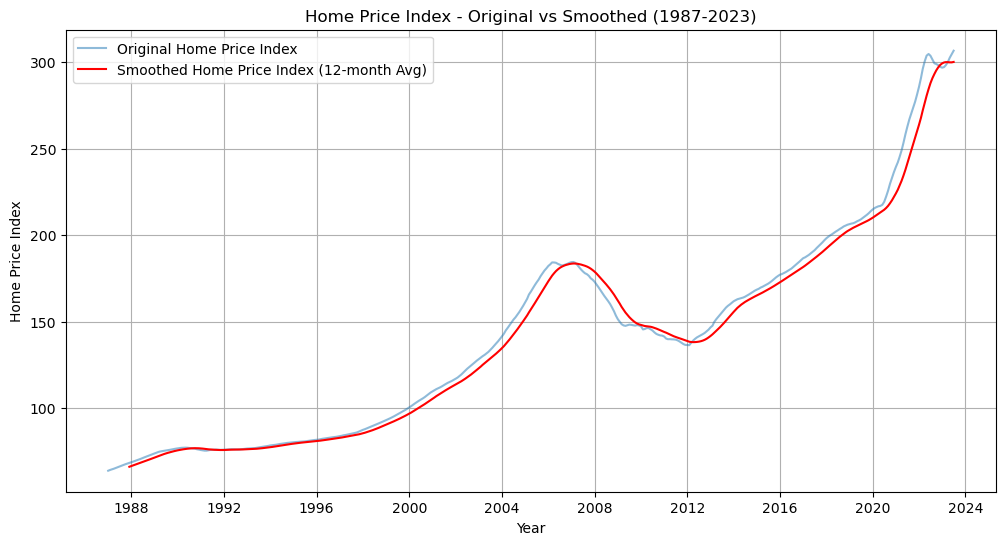

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset to ensure it's up to date
file_path = 'Merged_Dataset_1987_2023_Filled.csv'
filled_data = pd.read_csv(file_path)

# Ensure DATE is in datetime format and set as index
filled_data['DATE'] = pd.to_datetime(filled_data['DATE'])
filled_data.set_index('DATE', inplace=True)

# Apply a rolling mean to smooth the "Home Price Index" and other numerical columns
smoothed_data = filled_data.rolling(window=12).mean()  # 12-month rolling average

# Save the smoothed dataset
smoothed_file_path = 'Smoothed_Data_1987_2023.csv'
smoothed_data.to_csv(smoothed_file_path)

# Plot the original and smoothed Home Price Index for comparison
plt.figure(figsize=(12, 6))
plt.plot(filled_data.index, filled_data['CSUSHPISA'], label='Original Home Price Index', alpha=0.5)
plt.plot(smoothed_data.index, smoothed_data['CSUSHPISA'], label='Smoothed Home Price Index (12-month Avg)', color='red')
plt.title('Home Price Index - Original vs Smoothed (1987-2023)')
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.legend()
plt.grid()
plt.show()


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 加载平滑处理后的数据集
smoothed_data_path = 'Smoothed_Data_1987_2023.csv'
smoothed_data = pd.read_csv(smoothed_data_path)

# 去除 NaN：填充缺失值（这里使用列的中位数进行填充）
smoothed_data.fillna(smoothed_data.median(), inplace=True)

# 计算 VIF 的函数
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# 仅对数值型变量计算 VIF
numerical_data = smoothed_data.select_dtypes(include=[np.number])
vif_result = calculate_vif(numerical_data)

# 筛选 VIF < 10 的变量
selected_columns = vif_result[vif_result['VIF'] < 10]['Variable'].tolist()
filtered_data = numerical_data[selected_columns]

print("VIF：")
print(vif_result)

VIF：
       Variable         VIF
0           GDP  568.832462
1     CSUSHPISA  121.323871
2  MORTGAGE30US  108.823364
3        UNRATE   31.831624
4      CPIAUCSL  645.177249
5      FEDFUNDS   23.599769


/var/folders/zy/69kzjwdj6q1gjv9ns2v76cb40000gn/T/ipykernel_89707/1119717602.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  smoothed_data.fillna(smoothed_data.median(), inplace=True)


In [46]:
# 加载平滑处理后的数据集
smoothed_data_path = 'Smoothed_Data_1987_2023.csv'
smoothed_data = pd.read_csv(smoothed_data_path)

# 去除 NaN：填充缺失值（这里使用列的中位数进行填充）
smoothed_data.fillna(smoothed_data.median(numeric_only=True), inplace=True)

# 计算 VIF 的函数
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# 仅对数值型变量计算 VIF
numerical_data = smoothed_data.select_dtypes(include=[np.number])

# 移除 CSUSHPISA 列
if 'CSUSHPISA' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['CSUSHPISA'])

# 重新计算 VIF
vif_result = calculate_vif(numerical_data)

# 输出 VIF 结果
print("VIF after removing CSUSHPISA:")
print(vif_result)

VIF after removing CSUSHPISA:
       Variable         VIF
0           GDP  320.662359
1  MORTGAGE30US   97.159889
2        UNRATE   31.132126
3      CPIAUCSL  602.458141
4      FEDFUNDS   23.393205


In [47]:
# 加载平滑处理后的数据集
smoothed_data_path = 'Smoothed_Data_1987_2023.csv'
smoothed_data = pd.read_csv(smoothed_data_path)

# 去除 NaN：填充缺失值（这里使用列的中位数进行填充）
smoothed_data.fillna(smoothed_data.median(numeric_only=True), inplace=True)

# 计算 VIF 的函数
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# 仅对数值型变量计算 VIF
numerical_data = smoothed_data.select_dtypes(include=[np.number])

# 移除 CPIAUCSL 列
if 'CPIAUCSL' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['CPIAUCSL','CSUSHPISA','MORTGAGE30US'])

# 重新计算 VIF
vif_result = calculate_vif(numerical_data)

# 输出 VIF 结果
print("VIF after removing CPIAUCSL:")
print(vif_result)

VIF after removing CPIAUCSL:
   Variable       VIF
0       GDP  4.737343
1    UNRATE  6.419591
2  FEDFUNDS  1.953619


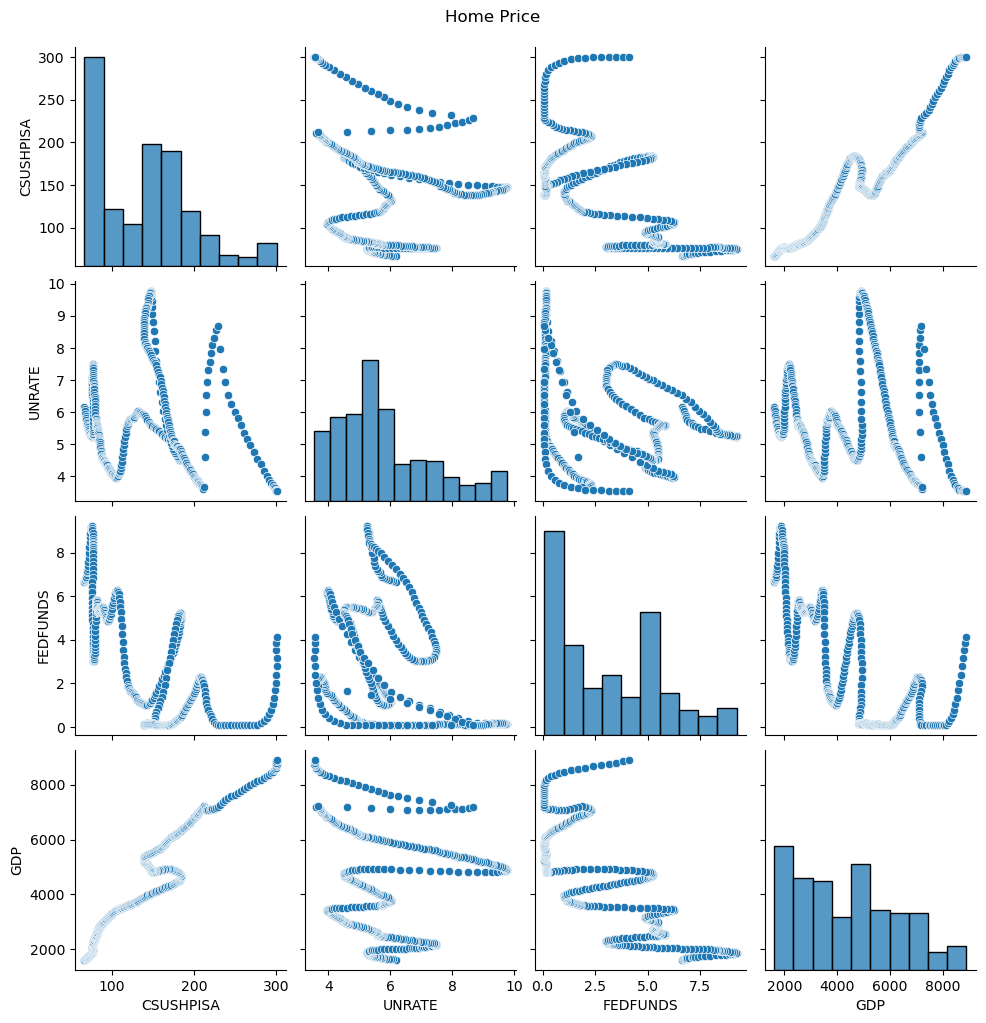

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 重新加载原始数据集（包含时间列）
smoothed_data = pd.read_csv('Smoothed_Data_1987_2023.csv')

# 保留时间列
time_column = smoothed_data['DATE']

# 仅对数值型变量进行筛选
numerical_data = smoothed_data.select_dtypes(include=[np.number])

# 移除高VIF变量
numerical_data = numerical_data.drop(columns=['CPIAUCSL', 'MORTGAGE30US'])

# 将时间列与筛选后的数据合并
filtered_data = pd.concat([time_column, numerical_data], axis=1)

# 保存最终数据集
filtered_data.to_csv('Filtered_Data_With_Time.csv', index=False)

# 选择目标因变量和自变量
y_variable = 'CSUSHPISA'
x_variables = ['UNRATE', 'FEDFUNDS', 'GDP']

# 检查数据
if y_variable not in numerical_data.columns or not all(var in numerical_data.columns for var in x_variables):
    raise ValueError("指定的变量不在数据集中。")

# 创建成对关系图
sns.pairplot(numerical_data, vars=[y_variable] + x_variables, diag_kind='hist', height=2.5)
plt.suptitle('Home Price', y=1.02)
plt.show()

In [52]:
# 重新加载原始数据集（包含时间列）
smoothed_data = pd.read_csv('Smoothed_Data_1987_2023.csv')

# 保留时间列
time_column = smoothed_data['DATE']

# 仅对数值型变量进行筛选
numerical_data = smoothed_data.select_dtypes(include=[np.number])

# 移除高VIF变量
numerical_data = numerical_data.drop(columns=['CPIAUCSL','MORTGAGE30US'])
print(numerical_data.head())
# 将时间列与筛选后的数据合并
filtered_data = pd.concat([time_column, numerical_data], axis=1)
print(filtered_data.head())
# 保存最终数据集
filtered_data.to_csv('Filtered_Data_With_Time.csv', index=False)

   GDP  CSUSHPISA  UNRATE  FEDFUNDS
0  NaN        NaN     NaN       NaN
1  NaN        NaN     NaN       NaN
2  NaN        NaN     NaN       NaN
3  NaN        NaN     NaN       NaN
4  NaN        NaN     NaN       NaN
         DATE  GDP  CSUSHPISA  UNRATE  FEDFUNDS
0  1987-01-01  NaN        NaN     NaN       NaN
1  1987-02-01  NaN        NaN     NaN       NaN
2  1987-03-01  NaN        NaN     NaN       NaN
3  1987-04-01  NaN        NaN     NaN       NaN
4  1987-05-01  NaN        NaN     NaN       NaN


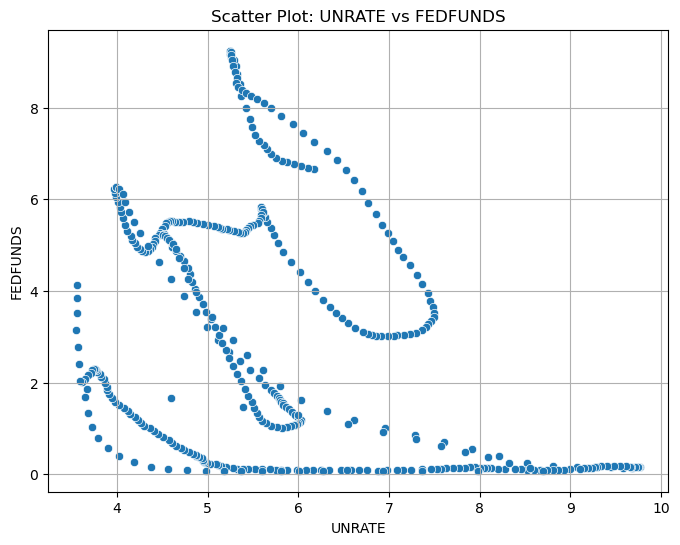

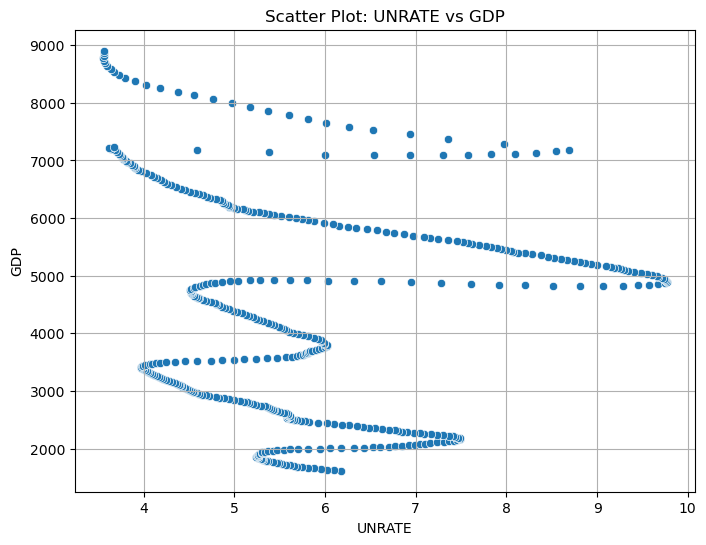

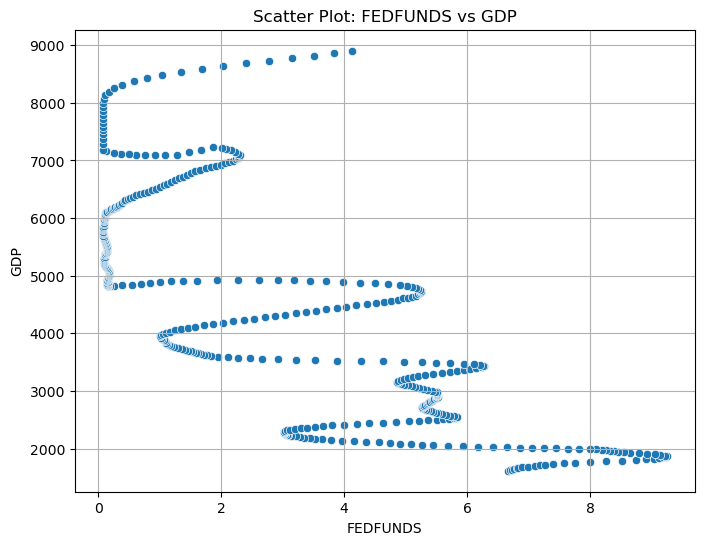

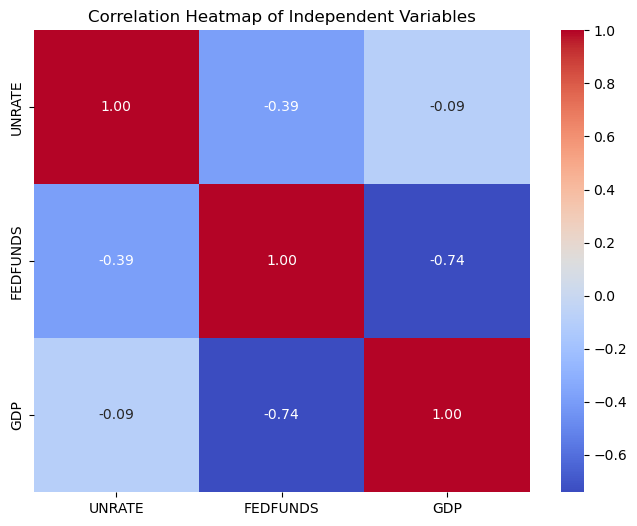

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 numerical_data 是你的数据集
numerical_data = pd.read_csv('Filtered_Data_With_Time.csv')

# 筛选自变量
independent_variables = ['UNRATE', 'FEDFUNDS', 'GDP']
filtered_data = numerical_data[independent_variables]

# 绘制自变量之间的散点图
for i, col1 in enumerate(filtered_data.columns):
    for j, col2 in enumerate(filtered_data.columns):
        if i < j:  # 避免重复绘制
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=filtered_data[col1], y=filtered_data[col2])
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid()
            plt.show()

# 绘制自变量之间的相关性热力图
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Independent Variables')
plt.show()


In [58]:
import pandas as pd

# Load the dataset
file_path = 'Filtered_Data_With_Time.csv'
data_with_time = pd.read_csv(file_path)

# Remove rows with missing values
data_no_nan = data_with_time.dropna()

# Save the cleaned dataset
cleaned_file_path = 'Filtered_Data_With_Time_No_Nan.csv'
data_no_nan.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'Filtered_Data_With_Time_No_Nan.csv'

Train MSE: 223.4360, R²: 0.9260
Test MSE: 193.2909, R²: 0.9560
Breusch-Pagan Test Results:
Lagrange multiplier statistic: 33.4651
p-value: 0.0000
f-value: 17.4115
f p-value: 0.0000


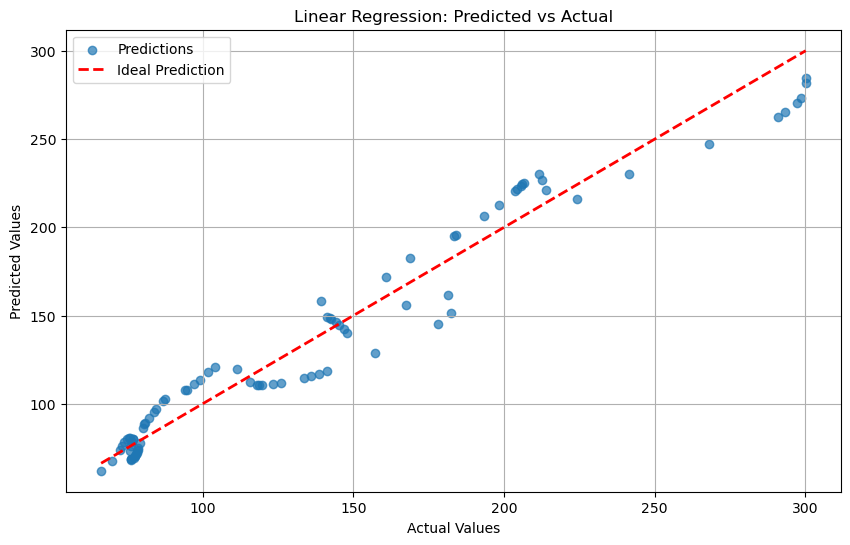

<Figure size 800x600 with 0 Axes>

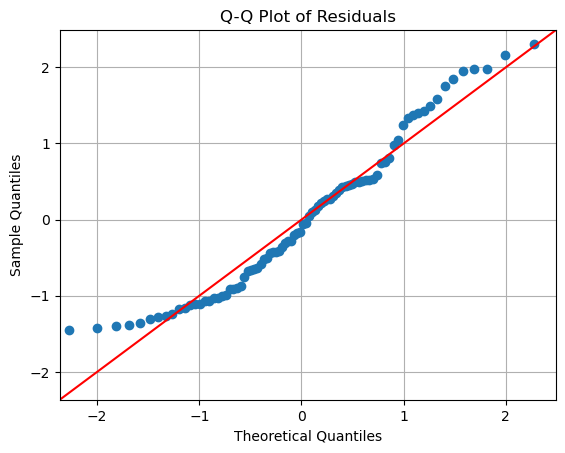

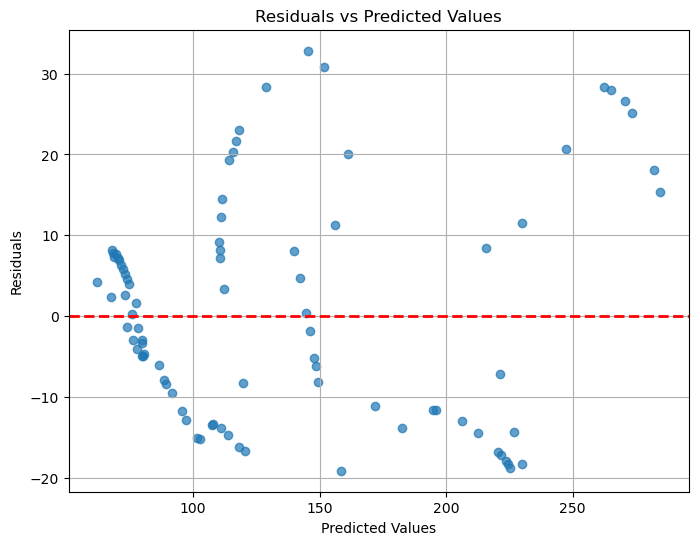

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan

# Load the dataset
file_path = 'Filtered_Data_With_Time_No_Nan.csv'
data = pd.read_csv(file_path)

# Ensure 'DATE' column is in datetime format and set it as index if it exists
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'])
    data = data.set_index('DATE')

# Separate target variable and features
X = data.drop(columns=['CSUSHPISA'])  # Features
y = data['CSUSHPISA']  # Target variable

# Keep only numerical features
X = X.select_dtypes(include=[float, int])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f"Train MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

# Residual analysis
residuals = y_test - y_pred_test

# Perform Breusch-Pagan test
X_test_const = sm.add_constant(X_test)  # Add constant term
bp_test = het_breuschpagan(residuals, X_test_const)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

# Print Breusch-Pagan test results
print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

# Visualize Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Q-Q Plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()##未能满足恒定方差测试

In [57]:
import pandas as pd

# Load the dataset
file_path = 'Smoothed_Data_1987_2023.csv'
data_with_time = pd.read_csv(file_path)

# Remove rows with missing values
data_no_nan = data_with_time.dropna()

# Save the cleaned dataset
cleaned_file_path = 'Smoothed_Data_1987_2023_No_Nan.csv'
data_no_nan.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'Smoothed_Data_1987_2023_No_Nan.csv'

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}
Train MSE: 6.1552, R²: 0.9980
Test MSE: 5.7854, R²: 0.9987
Breusch-Pagan Test Results:
Lagrange multiplier statistic: 40.7455
p-value: 0.0000
f-value: 14.4058
f p-value: 0.0000
Residuals do not have constant variance (Failed Breusch-Pagan Test)


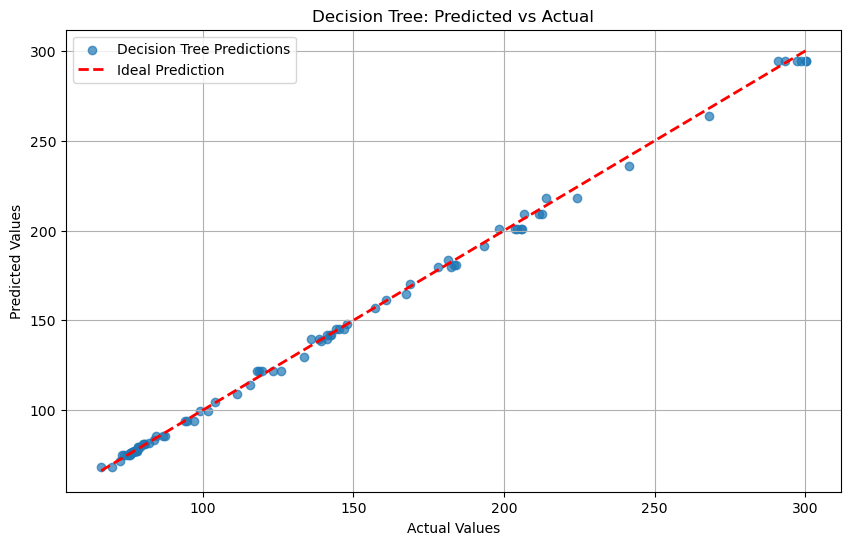

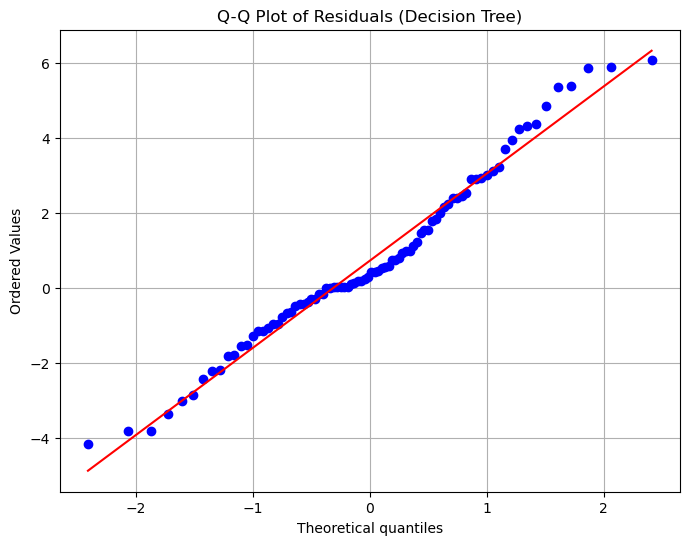

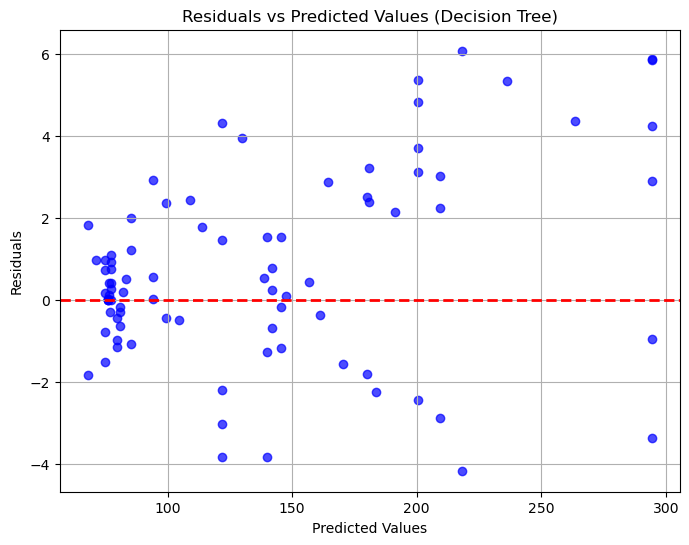

In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Smoothed_Data_1987_2023_No_Nan.csv')
data['DATE'] = pd.to_datetime(data['DATE'])  # Ensure DATE is in datetime format
data = data.set_index('DATE')  # Set DATE as the index

# Separate target variable and features
X = data.drop(columns=['CSUSHPISA'])  # Features
y = data['CSUSHPISA']  # Target variable

# Keep only numerical features
X = X.select_dtypes(include=[float, int])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Decision Tree Regressor with Grid Search
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred_train = best_dt_model.predict(X_train)
y_pred_test = best_dt_model.predict(X_test)

# Model Evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

# Residual Analysis
residuals = y_test - y_pred_test

# Breusch-Pagan Test
X_test_const = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_test_const)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

if bp_results['p-value'] > 0.05:
    print("Residuals have constant variance (Passed Breusch-Pagan Test)")
else:
    print("Residuals do not have constant variance (Failed Breusch-Pagan Test)")

# Visualization of Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title('Decision Tree: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Decision Tree)')
plt.grid()
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values (Decision Tree)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


Train MSE: 3.8880, R²: 0.9987
Test MSE: 4.0993, R²: 0.9991


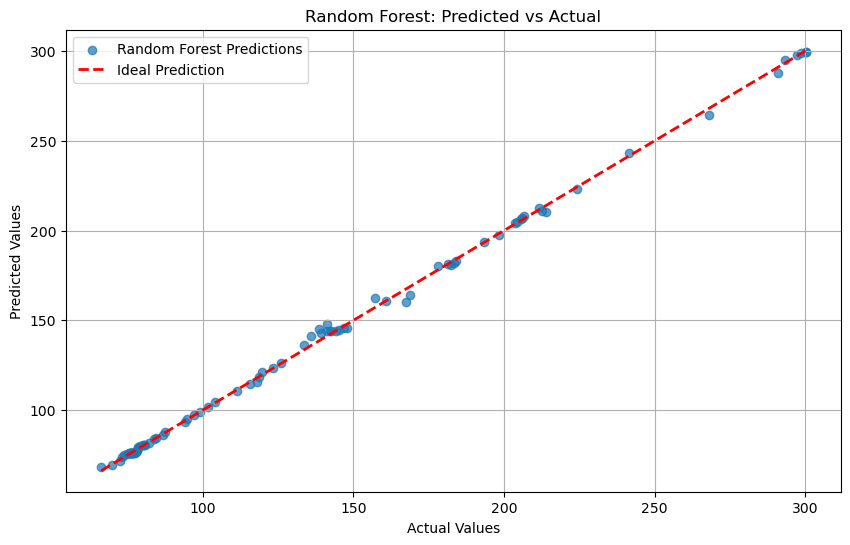

<Figure size 800x600 with 0 Axes>

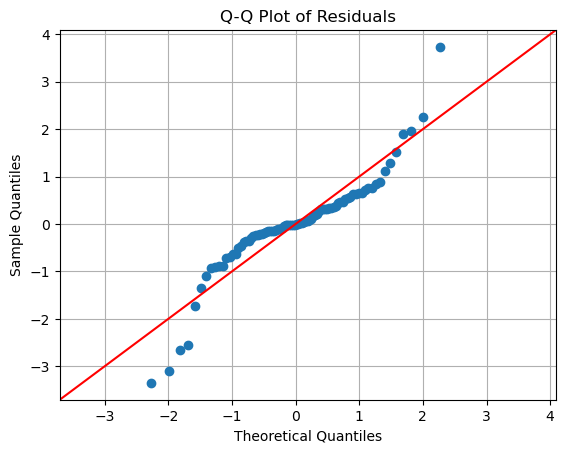

Shapiro-Wilk Test: W=0.8889, p-value=0.0000
Residuals do not follow the normality assumption
Breusch-Pagan Test Results:
Lagrange multiplier statistic: 10.8365
p-value: 0.0547
f-value: 2.3068
f p-value: 0.0519
Residuals have constant variance (Passed Breusch-Pagan Test)


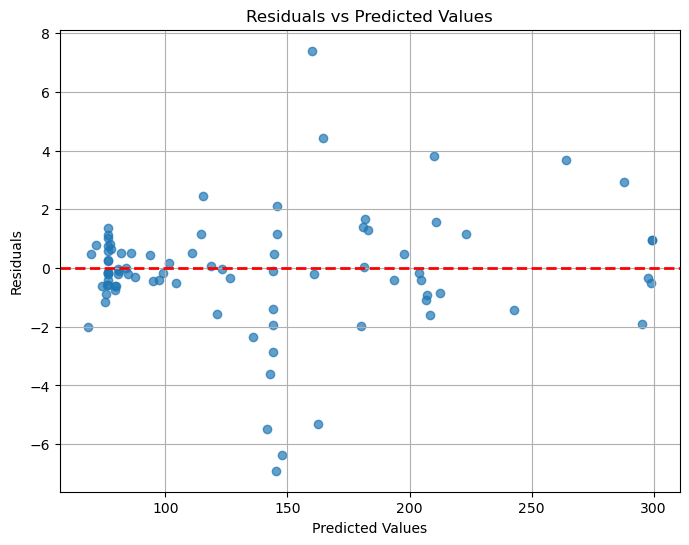

In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Load the dataset(错的)
data = pd.read_csv('Smoothed_Data_1987_2023_No_Nan.csv')
data['DATE'] = pd.to_datetime(data['DATE'])  # Ensure DATE is in datetime format
data = data.set_index('DATE')  # Set DATE as the index

# Separate target variable and features
X = data.drop(columns=['CSUSHPISA'])  # Features
y = data['CSUSHPISA']  # Target variable

# Keep only numerical features
X = X.select_dtypes(include=[float, int])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
rf_model = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)  # n_estimators can be adjusted to optimize performance
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Model evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Calculate residuals
residuals = y_test - y_pred_test

# **1. Check if residuals follow a normal distribution (Q-Q Plot)**
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

# **2. Normality test (Shapiro-Wilk Test)**
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Residuals follow the normality assumption")
else:
    print("Residuals do not follow the normality assumption")

# **3. Check if residuals have homoscedasticity (Breusch-Pagan Test)**
X_test_const = sm.add_constant(X_test)  # Add constant term
bp_test = sm.stats.het_breuschpagan(residuals, X_test_const)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

if bp_results['p-value'] > 0.05:
    print("Residuals have constant variance (Passed Breusch-Pagan Test)")
else:
    print("Residuals do not have constant variance (Failed Breusch-Pagan Test)")

# **4. Visualize residuals vs predicted values**
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()



In [ ]:
# Import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'Smoothed_Data_1987_2023_No_Nan.csv'
data = pd.read_csv(file_path)

# Separate target variable and features
X = data.drop(columns=['CSUSHPISA'])  # Features
y = data['CSUSHPISA']  # Target variable

# Keep only numerical features
X = X.select_dtypes(include=[float, int])

# Scale the target variable
y = y.values.reshape(-1, 1)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model with improvements
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))  # Single output for regression

# Compile the model with a tuned learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation
history = model.fit(
    X_train, y_train,
    validation_split=0.2,

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Output metrics
metrics = {
    "Train MSE": mse_train,
    "Test MSE": mse_test,
    "Train R²": r2_train,
    "Test R²": r2_test,
}

metrics

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Neural Network Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')
plt.title('Neural Network: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# Calculate residuals
residuals = y_test.flatten() - y_pred_test

# **1. Check if residuals follow a normal distribution (Q-Q Plot)**
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()

# **2. Normality test (Shapiro-Wilk Test)** ?????
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Residuals follow the normality assumption")
else:
    print("Residuals do not follow the normality assumption")

# **3. Check if residuals have homoscedasticity (Breusch-Pagan Test)**
X_test_const = sm.add_constant(X_test)  # Add constant term
bp_test = sm.stats.het_breuschpagan(residuals, X_test_const)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

if bp_results['p-value'] > 0.05:
    print("Residuals have constant variance (Passed Breusch-Pagan Test)")
else:
    print("Residuals do not have constant variance (Failed Breusch-Pagan Test)")

# **4. Visualize residuals vs predicted values**
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyl
